In [1]:
# 加载功能模块
from datetime import datetime

from vnpy.trader.constant import Interval

from elite_optionstrategy import BacktestingEngine

from short_straddle_strategy import ShortStraddleStrategy

In [2]:
# 创建回测引擎
engine = BacktestingEngine()

engine.set_parameters(
    interval=Interval.MINUTE,
    start=datetime(2021, 1, 1),
    end=datetime(2022, 12, 31),
    rate=0,
    slippage=0.6 + (16 / 100),
)

engine.add_strategy(ShortStraddleStrategy, {})

In [3]:
# 历史数据回放
engine.run_backtesting()

100%|██████████| 729/729 [33:07<00:00,  2.73s/it]


In [4]:
# 计算每日盈亏
engine.calculate_result()

2024-02-02 15:25:46.305300	开始计算逐日盯市盈亏
2024-02-02 15:25:46.311048	逐日盯市盈亏计算完成


trade_count  turnover  commission  slippage  trading_pnl  \
date                                                                   
2021-01-04            2   17780.0         0.0     152.0        800.0   
2021-01-05            0       0.0         0.0       0.0          0.0   
2021-01-06            0       0.0         0.0       0.0          0.0   
2021-01-07            0       0.0         0.0       0.0          0.0   
2021-01-08            0       0.0         0.0       0.0          0.0   
...                 ...       ...         ...       ...          ...   
2022-12-26            0       0.0         0.0       0.0          0.0   
2022-12-27            0       0.0         0.0       0.0          0.0   
2022-12-28            0       0.0         0.0       0.0          0.0   
2022-12-29            0       0.0         0.0       0.0          0.0   
2022-12-30            0       0.0         0.0       0.0          0.0   

            holding_pnl  total_pnl  net_pnl  
date                                         
2021-01-04          0.0      800.0    648.0  
2021-01-05      -4900.0    -4900.0  -4900.0  
2021-01-06      -3500.0    -3500.0  -3500.0  
2021-01-07      -9620.0    -9620.0  -9620.0  
2021-01-08       3080.0     3080.0   3080.0  
...                 ...        ...      ...  
2022-12-26       1080.0     1080.0   1080.0  
2022-12-27       2960.0     2960.0   2960.0  
2022-12-28       -360.0     -360.0   -360.0  
2022-12-29       -580.0     -580.0   -580.0  
2022-12-30       1540.0     1540.0   1540.0  

[485 rows x 8 columns]

In [5]:
# 统计绩效结果
result = engine.calculate_statistics()

2024-02-02 15:25:46.404666	开始计算策略统计指标
2024-02-02 15:25:46.414165	------------------------------
2024-02-02 15:25:46.414165	首个交易日：	2021-01-04 00:00:00
2024-02-02 15:25:46.414165	最后交易日：	2022-12-30 00:00:00
2024-02-02 15:25:46.414165	总交易日：	485
2024-02-02 15:25:46.414165	盈利交易日：	296
2024-02-02 15:25:46.414165	亏损交易日：	188
2024-02-02 15:25:46.414165	起始资金：	1,000,000.00
2024-02-02 15:25:46.414165	结束资金：	1,061,360.00
2024-02-02 15:25:46.414165	总收益率：	6.14%
2024-02-02 15:25:46.414165	年化收益：	3.04%
2024-02-02 15:25:46.414165	最大回撤: 	-67,852.00
2024-02-02 15:25:46.414165	最大回撤%: 	-6.72%
2024-02-02 15:25:46.414165	总盈亏：	61,360.00
2024-02-02 15:25:46.414165	总手续费：	0.00
2024-02-02 15:25:46.414165	总滑点：	3,800.00
2024-02-02 15:25:46.414165	总成交金额：	498,060.00
2024-02-02 15:25:46.414165	总成交笔数：	50
2024-02-02 15:25:46.414165	日均盈亏：	126.52
2024-02-02 15:25:46.414165	日均手续费：	0.00
2024-02-02 15:25:46.414165	日均滑点：	7.84
2024-02-02 15:25:46.414165	日均成交金额：	1,026.93
2024-02-02 15:25:46.414165	日均成交笔数：	0.10309278350515463
2024-02

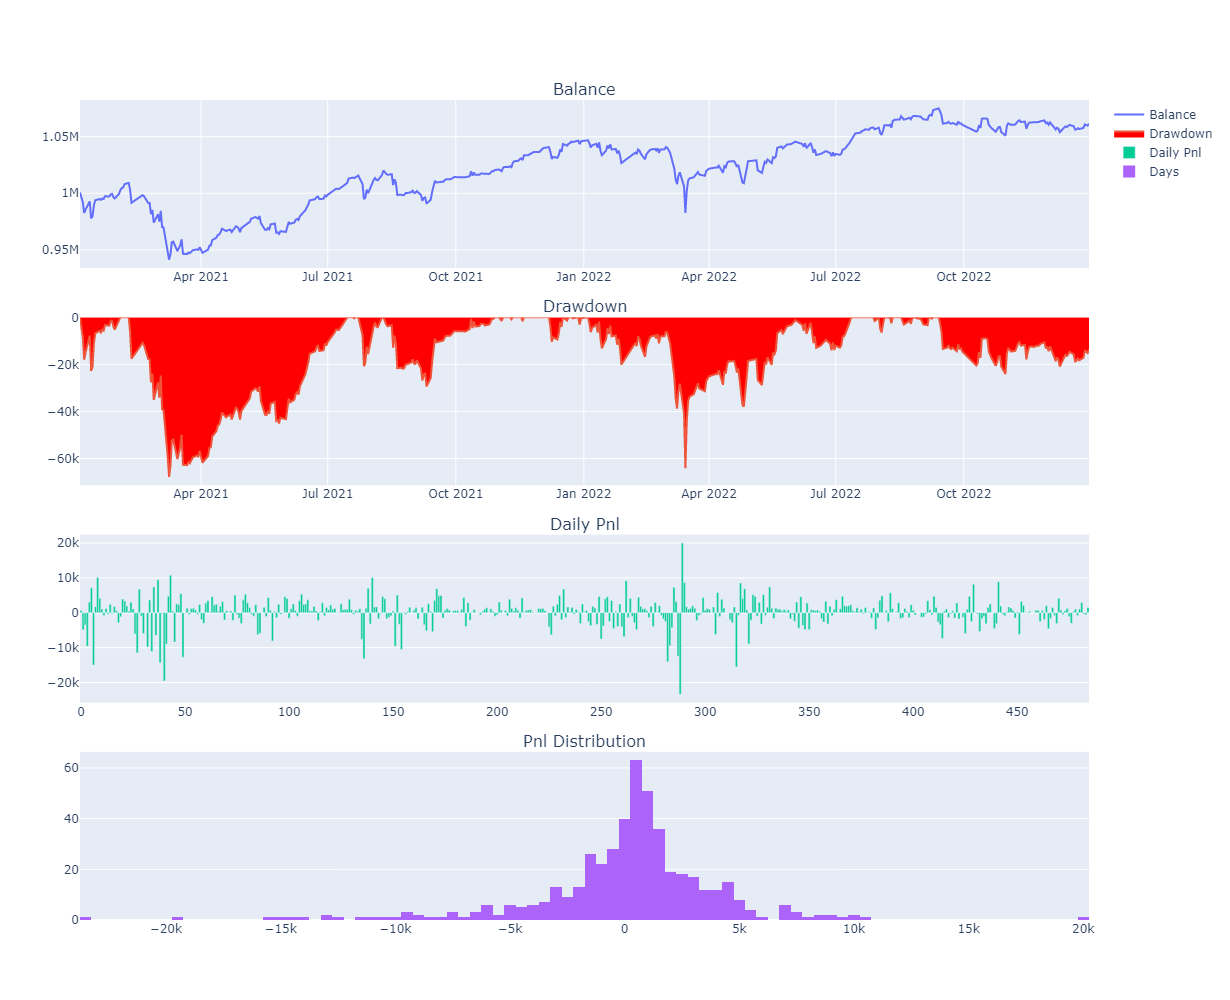

In [6]:
# 显示资金图表
engine.show_chart()

In [7]:
# 打印逐笔成交
for trade in engine.all_trades.values():
    print(trade.datetime, trade.vt_symbol, trade.direction.value, trade.offset.value, trade.volume, "@", trade.price)

2021-01-04 09:31:00+08:00 IO2101-P-5200.CFFEX 空 开 1 @ 72.0
2021-01-04 09:31:00+08:00 IO2101-C-5200.CFFEX 空 开 1 @ 105.8
2021-01-18 09:31:00+08:00 IO2102-C-5500.CFFEX 空 开 1 @ 128.6
2021-01-18 09:31:00+08:00 IO2102-P-5500.CFFEX 空 开 1 @ 170.2
2021-02-22 09:31:00+08:00 IO2103-P-5800.CFFEX 空 开 1 @ 164.6
2021-02-22 09:31:00+08:00 IO2103-C-5800.CFFEX 空 开 1 @ 123.0
2021-03-22 09:31:00+08:00 IO2104-P-4950.CFFEX 空 开 1 @ 121.2
2021-03-22 09:31:00+08:00 IO2104-C-4950.CFFEX 空 开 1 @ 115.8
2021-04-19 09:31:00+08:00 IO2105-C-4950.CFFEX 空 开 1 @ 107.6
2021-04-19 09:31:00+08:00 IO2105-P-4950.CFFEX 空 开 1 @ 123.0
2021-05-24 09:31:00+08:00 IO2106-C-5100.CFFEX 空 开 1 @ 118.0
2021-05-24 09:31:00+08:00 IO2106-P-5100.CFFEX 空 开 1 @ 100.8
2021-06-21 09:31:00+08:00 IO2107-C-5100.CFFEX 空 开 1 @ 85.2
2021-06-21 09:31:00+08:00 IO2107-P-5100.CFFEX 空 开 1 @ 123.8
2021-07-19 09:31:00+08:00 IO2108-C-5100.CFFEX 空 开 1 @ 81.2
2021-07-19 09:31:00+08:00 IO2108-P-5100.CFFEX 空 开 1 @ 132.0
2021-08-23 09:31:00+08:00 IO2109-P-4750.CFF